# Lead Scoring - Case Study
##Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

##Goals of Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [22]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

# Step 2: Inspecting the Dataframe



In [26]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [27]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [28]:
#Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [29]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0


True

In [30]:
#check for duplicates

sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

# #Exploratory Data Analysis

### Step 3: Data Cleaning

In [31]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 


As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

# 3.2 Dropping Columns with Missing Values >=35%

In [33]:

#Drop all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [34]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# 3.3 Categorical Attributes Analysis:

Imbalanced Variables

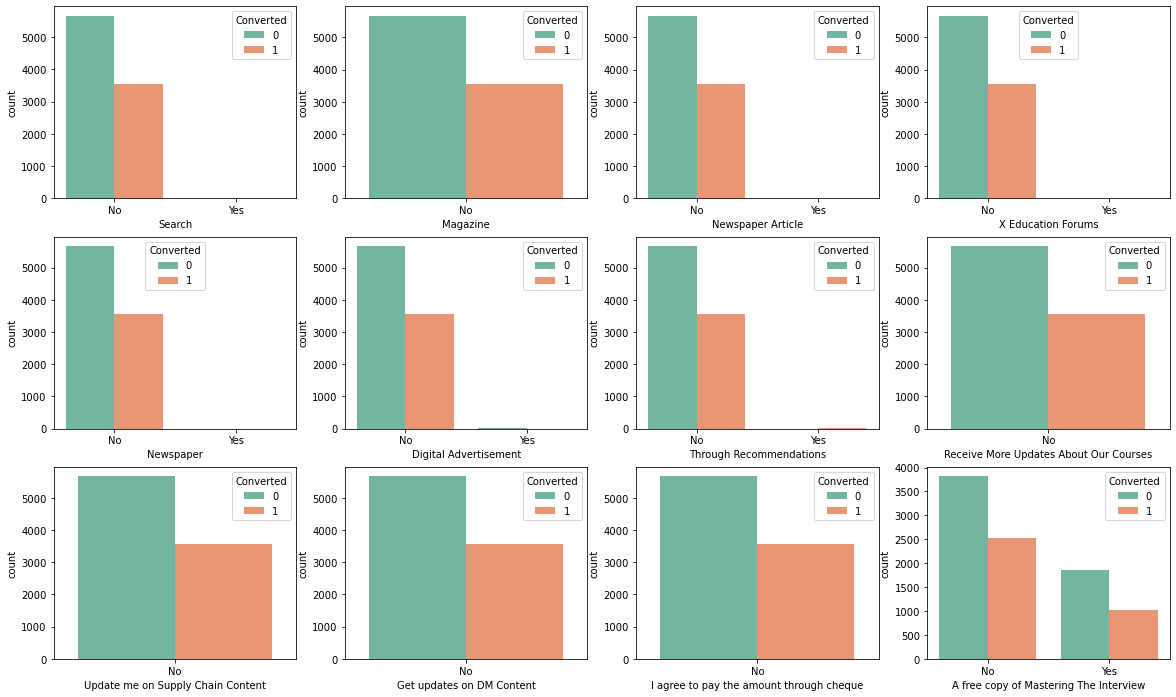

In [35]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3],palette = 'Set2')
plt.show()

Inference

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
"A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [36]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

# Lead Source

In [37]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [22]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')


In [23]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

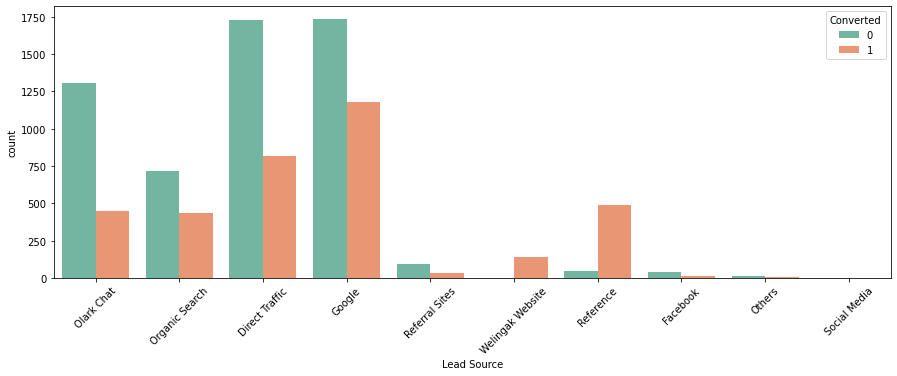

In [24]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()



Inference

Maximum Leads are generated by Google and Direct Traffic.
Conversion rate of Reference leads and Welinkgak Website leads is very high.

Country

In [25]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Since, missing values are very high , we can impute all missing values with value 'not provided'

In [26]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')


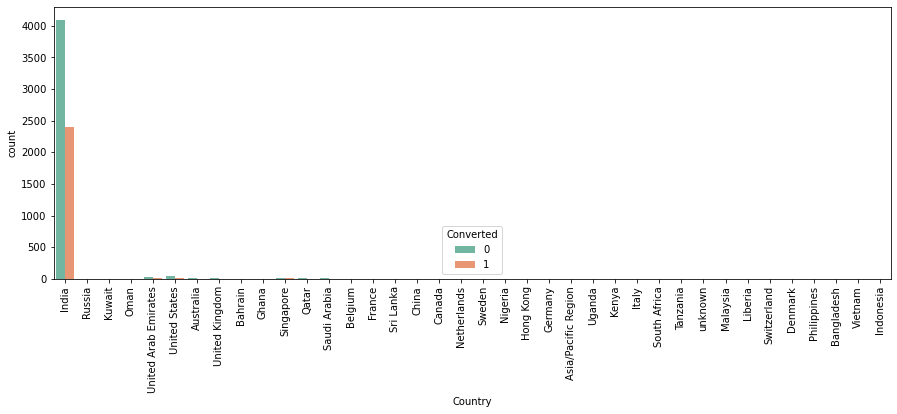

In [38]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [39]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

### What is your current occupation

In [40]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided'

In [41]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

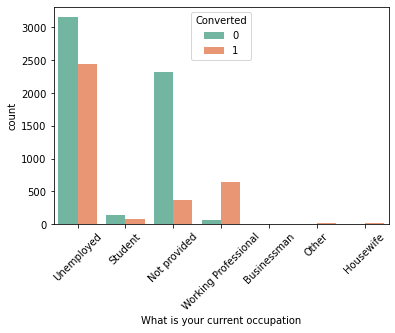

In [42]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

# Inference

##-Maximum leads generated are unemployed and their conversion rate is more than 50%.
##-Conversion rate of working professionals is very high.

### What matters most to you in choosing a course

In [43]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### Clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

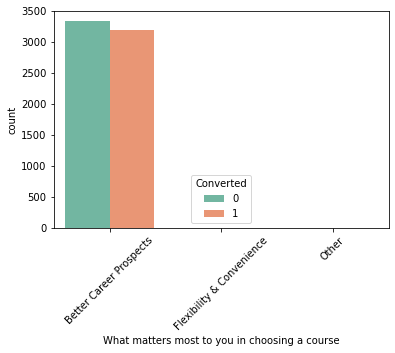

In [34]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


In [44]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [45]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
  #replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')


In [46]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

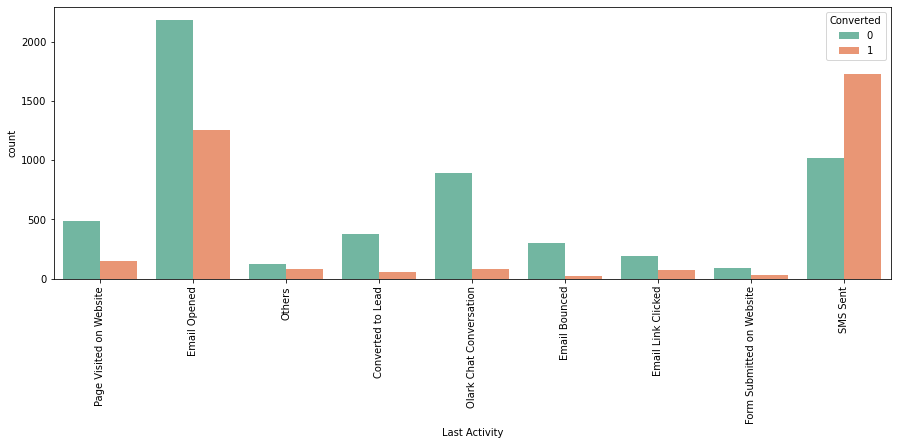

In [47]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Inference

     - Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
     - SMS sent as last acitivity has high conversion rate.

In [48]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [30]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [49]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [50]:
leads_df.shape

(4925, 31)

In [51]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

# Lead Origin

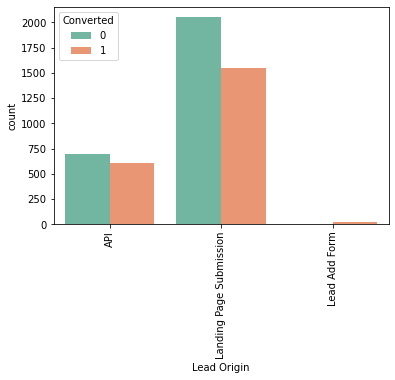

In [52]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Do Not Email & Do Not Call

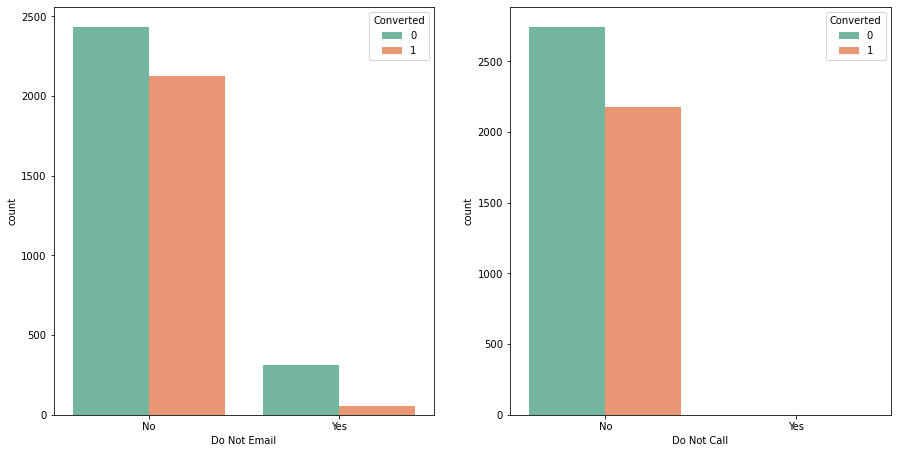

In [53]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set2')
plt.show()

#### Last Notable Activity

In [54]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Email Opened                    1617
Modified                        1487
SMS Sent                        1406
Page Visited on Website          192
Email Link Clicked                77
Olark Chat Conversation           45
Email Bounced                     39
Unsubscribed                      27
Unreachable                       18
Had a Phone Conversation          13
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [55]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

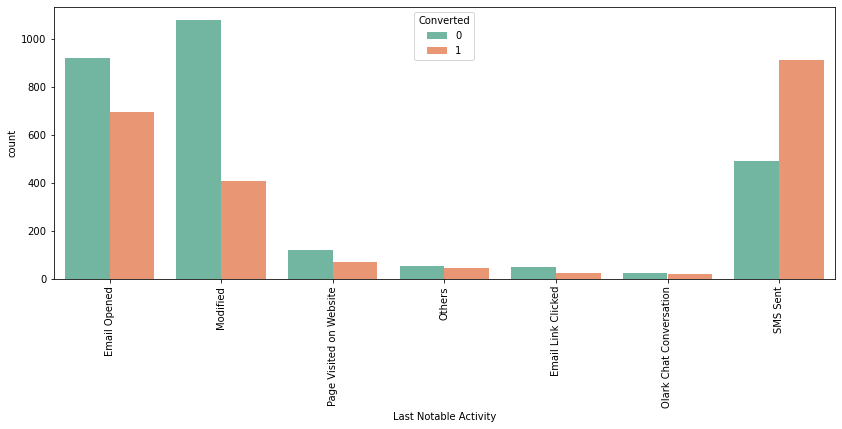

In [56]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Inference

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.

In [54]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')


In [57]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [58]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         4925 non-null   object 
 1   Lead Number                         4925 non-null   int64  
 2   Lead Origin                         4925 non-null   object 
 3   Lead Source                         4925 non-null   object 
 4   Do Not Email                        4925 non-null   object 
 5   Do Not Call                         4925 non-null   object 
 6   Converted                           4925 non-null   int64  
 7   TotalVisits                         4925 non-null   float64
 8   Total Time Spent on Website         4925 non-null   int64  
 9   Page Views Per Visit                4925 non-null   float64
 10  Specialization                      4925 non-null   object 
 11  How did you hear about X Education  4925 no

In [59]:
#checking dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Select,Select,Unemployed,Select,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Select,Student,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Select,Other,Unemployed,Select,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Supply Chain Management,Online Search,Unemployed,Potential Lead,Mumbai,Modified


# 3.4 Numerical Attributes Analysis:

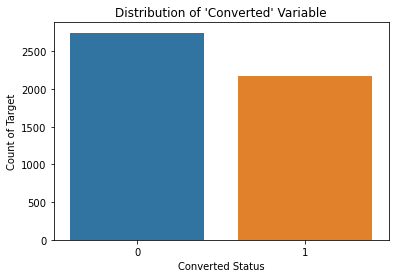

In [60]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [61]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

44.22335025380711

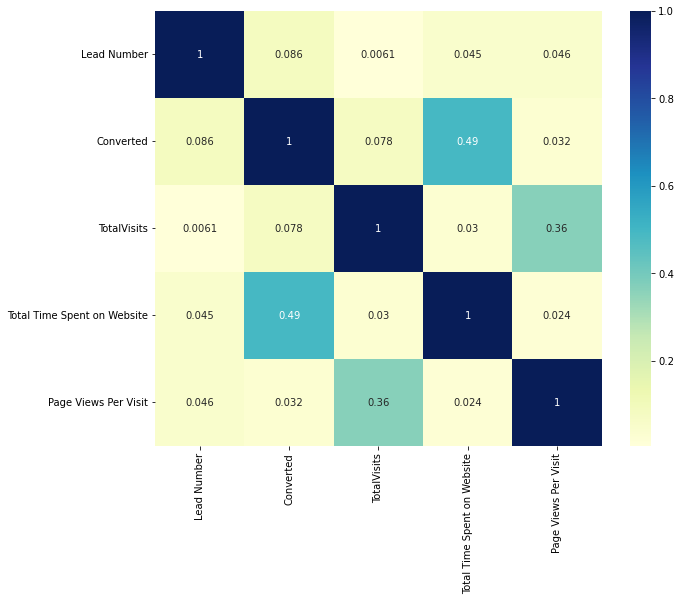

In [62]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

# - Total Visits

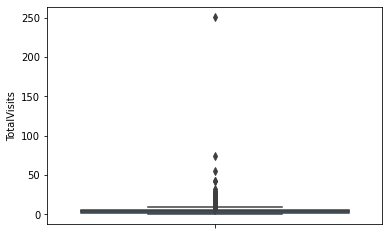

In [63]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

Presence of outliers can be seen clearly

In [64]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4925.000000
mean        4.586599
std         5.074152
min         0.000000
5%          2.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

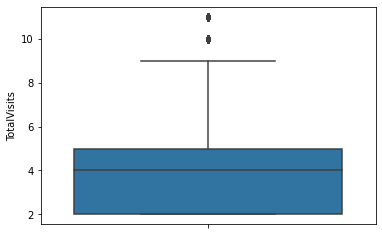

In [65]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

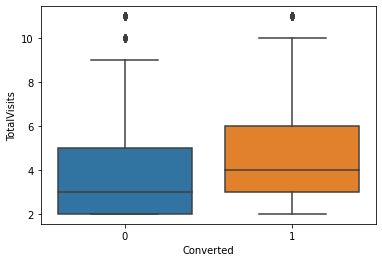

In [66]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

- Inference-
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

### Total time spent on website

In [67]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4925.000000
mean      676.550254
std       554.561259
min         0.000000
5%         33.200000
25%       183.000000
50%       461.000000
75%      1156.000000
90%      1492.600000
95%      1637.000000
99%      1875.520000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

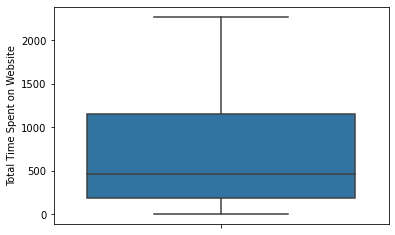

In [68]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

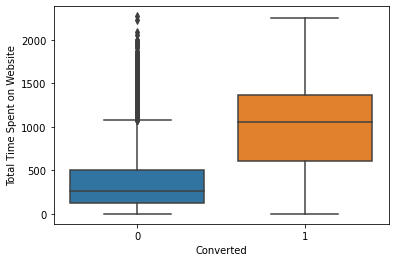

In [69]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

### Page views per visit

In [70]:
leads['Page Views Per Visit'].describe()

count    4925.000000
mean        3.157206
std         1.968820
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

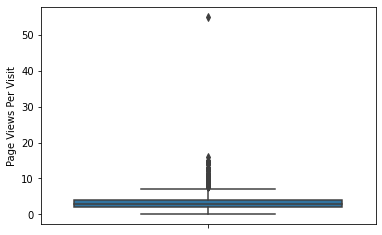

In [71]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

##### Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

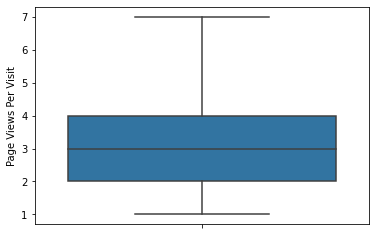

In [72]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

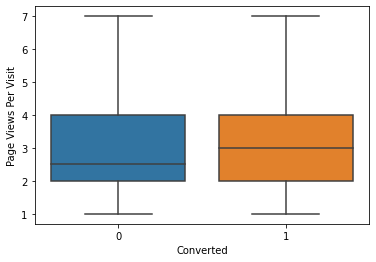

In [73]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

### Inference

- Median for converted and not converted leads is almost same.
- Nothing conclusive can be said on the basis of Page Views Per Visit.

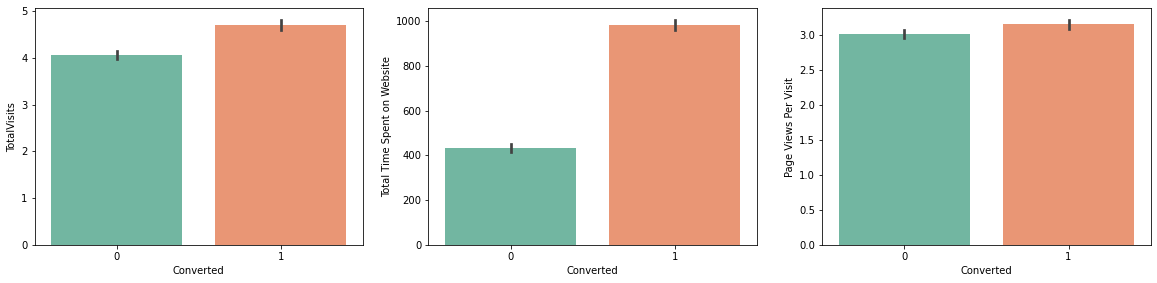

In [76]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

#### Inference
- The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# Step 4: Data Preparation
4.1 Converting some binary variables (Yes/No) to 0/1

In [75]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)


In [77]:

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Select,Select,Unemployed,Select,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Select,Student,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,2.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Select,Other,Unemployed,Select,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Supply Chain Management,Online Search,Unemployed,Potential Lead,Mumbai,Modified


In [78]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         4925 non-null   object 
 1   Lead Number                         4925 non-null   int64  
 2   Lead Origin                         4925 non-null   object 
 3   Lead Source                         4925 non-null   object 
 4   Do Not Email                        4925 non-null   object 
 5   Do Not Call                         4925 non-null   object 
 6   Converted                           4925 non-null   int64  
 7   TotalVisits                         4925 non-null   float64
 8   Total Time Spent on Website         4925 non-null   int64  
 9   Page Views Per Visit                4925 non-null   float64
 10  Specialization                      4925 non-null   object 
 11  How did you hear about X Education  4925 no

### 4.2 Dummy Variable Creation:

In [79]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [80]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [81]:
#checking dataset after dummy variable creation
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,2.0,305,1.0
4,660681,1,2.0,1428,1.0
6,660673,1,2.0,1640,2.0


# Step 5: Test-Train Split

In [82]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [83]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,660728,5.0,674,2.5
2,660727,2.0,1532,2.0
3,660719,2.0,305,1.0
4,660681,2.0,1428,1.0
6,660673,2.0,1640,2.0


In [84]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


# Step 6: Feature Scaling

In [105]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [106]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7442,-1.012993,-0.924565,1.701466,-0.687651
6273,-0.618811,1.064312,-0.378271,2.522658
6160,-0.584464,-0.924565,0.103050,-0.687651
609,1.608684,0.268761,-1.213398,-0.899531
4543,-0.007537,-0.129014,-0.450110,0.596473


In [107]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

44.22335025380711

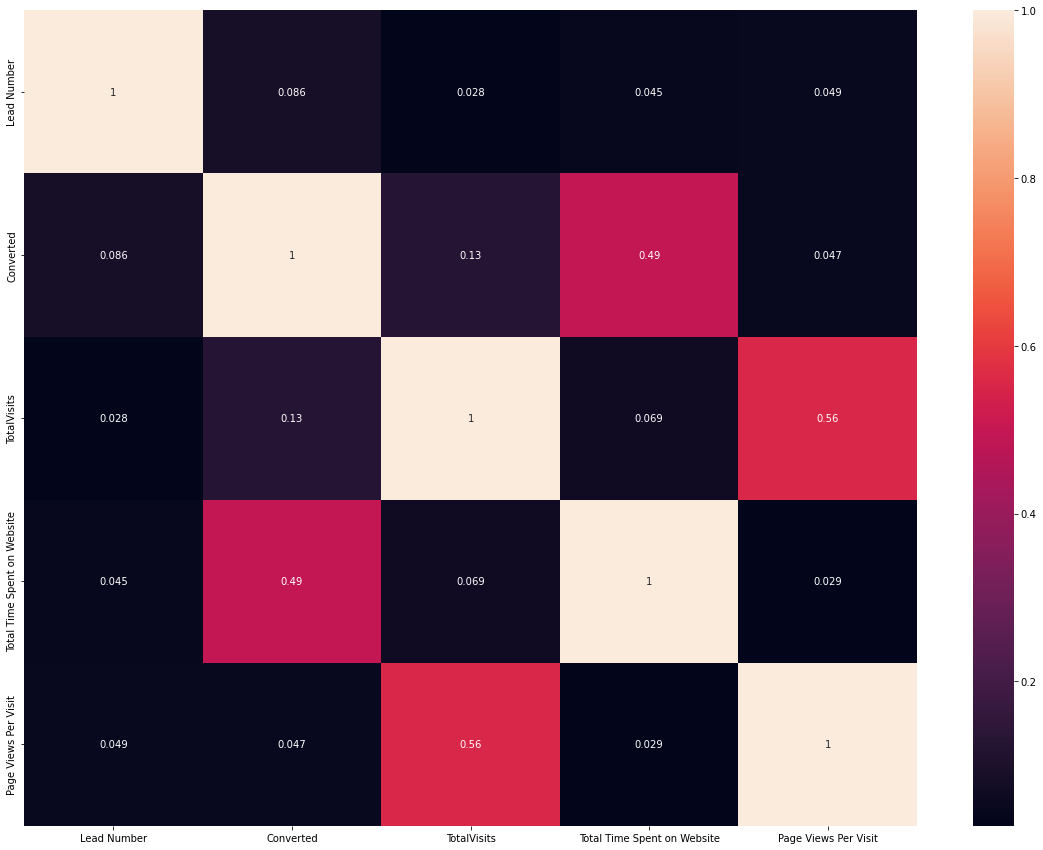

In [108]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

# Step 7: Model Building using Stats Model & RFE

In [97]:
# importing necessary library
import statsmodels.api as sm

In [124]:
# Using rfe for features selection
logreg=LogisticRegression()

In [127]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(logreg)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [128]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 2),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3)]

In [129]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website'], dtype='object')

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 2),
 ('Do Not Email', False, 2),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1)]

In [130]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Page Views Per Visit'], dtype='object')

# Model 1

In [131]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.4
Date:                Thu, 25 May 2023   Deviance:                       3710.9
Time:                        21:59:30   Pearson chi2:                 3.59e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2745      0.040     -6.811      0.000      -0.354      -0.196
TotalVisits                     0.2547      0.040      6.301      0.000       0.175       0.334
Total Time Spent on Website     1.2101      0.044     27.196      0.000       1.123       1.297
===============================================================================================
"""

p-value of variable What is your current occupation_Housewife is high, so we can drop it.

# Model 2

In [132]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.4
Date:                Thu, 25 May 2023   Deviance:                       3710.9
Time:                        21:59:34   Pearson chi2:                 3.59e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2745      0.040     -6.811      0.000      -0.354      -0.196
TotalVisits                     0.2547      0.040      6.301      0.000       0.175       0.334
Total Time Spent on Website     1.2101      0.044     27.196      0.000       1.123       1.297
===============================================================================================
"""

# Model 3

In [134]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.4
Date:                Thu, 25 May 2023   Deviance:                       3710.9
Time:                        21:59:47   Pearson chi2:                 3.59e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2745      0.040     -6.811      0.000      -0.354      -0.196
TotalVisits                     0.2547      0.040      6.301      0.000       0.175       0.334
Total Time Spent on Website     1.2101      0.044     27.196      0.000       1.123       1.297
===============================================================================================
"""

# Model 4

In [135]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.4
Date:                Thu, 25 May 2023   Deviance:                       3710.9
Time:                        21:59:50   Pearson chi2:                 3.59e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2745      0.040     -6.811      0.000      -0.354      -0.196
TotalVisits                     0.2547      0.040      6.301      0.000       0.175       0.334
Total Time Spent on Website     1.2101      0.044     27.196      0.000       1.123       1.297
===============================================================================================
"""

In [136]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.4
Date:                Thu, 25 May 2023   Deviance:                       3710.9
Time:                        21:59:53   Pearson chi2:                 3.59e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2745      0.040     -6.811      0.000      -0.354      -0.196
TotalVisits                     0.2547      0.040      6.301      0.000       0.175       0.334
Total Time Spent on Website     1.2101      0.044     27.196      0.000       1.123       1.297
===============================================================================================
"""

Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

### Calculating VIF

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,1.01
1,Total Time Spent on Website,1.01


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

# Predicting a Train model

In [138]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7442    0.824755
6273    0.386715
6160    0.404845
609     0.157843
4543    0.299004
6886    0.299288
4635    0.337822
4475    0.158931
5305    0.242120
2742    0.550197
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.82475522, 0.38671508, 0.40484451, 0.15784299, 0.29900431,
       0.29928789, 0.33782233, 0.15893088, 0.2421202 , 0.55019707])

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.824755,7442
1,0,0.386715,6273
2,0,0.404845,6160
3,0,0.157843,609
4,1,0.299004,4543


In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.824755,7442,1
1,0,0.386715,6273,0
2,0,0.404845,6160,0
3,0,0.157843,609,0
4,1,0.299004,4543,0


In [142]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1585  349]
 [ 473 1040]]


In [143]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7615317667536988


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6873760740251157

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8195449844881075

In [148]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.18045501551189244


In [149]:
# positive predictive value 
print (TP / float(TP+FP))

0.7487401007919366


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7701652089407192


# PLOTTING ROC CURVE
- An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

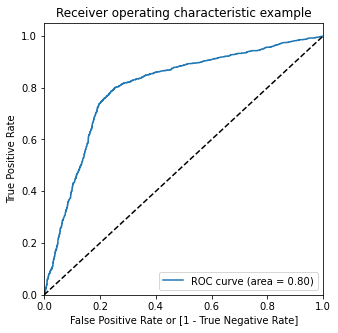

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

## Finding Optimal Cutoff Point

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.824755,7442,1,1,1,1,1,1,1,1,1,1,0
1,0,0.386715,6273,0,1,1,1,1,0,0,0,0,0,0
2,0,0.404845,6160,0,1,1,1,1,1,0,0,0,0,0
3,0,0.157843,609,0,1,1,0,0,0,0,0,0,0,0
4,1,0.299004,4543,0,1,1,1,0,0,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438932  1.000000  0.000000
0.1   0.1  0.438932  1.000000  0.000000
0.2   0.2  0.611546  0.917383  0.372285
0.3   0.3  0.748767  0.826173  0.688211
0.4   0.4  0.771686  0.764045  0.777663
0.5   0.5  0.761532  0.687376  0.819545
0.6   0.6  0.727879  0.574356  0.847983
0.7   0.7  0.688715  0.421679  0.897622
0.8   0.8  0.630113  0.224058  0.947777
0.9   0.9  0.574703  0.044283  0.989659


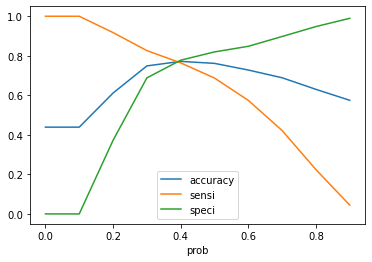

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [157]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.824755,7442,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.386715,6273,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.404845,6160,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.157843,609,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.299004,4543,0,1,1,1,0,0,0,0,0,0,0,0


In [158]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.824755,7442,1,82
1,0,0.386715,6273,1,39
2,0,0.404845,6160,1,40
3,0,0.157843,609,0,16
4,1,0.299004,4543,0,30


In [159]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1250
0     263
Name: final_Predicted, dtype: int64

In [160]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

### Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.
- Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7487670438062083

In [162]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1331,  603],
       [ 263, 1250]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8261731658955717

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.688210961737332

# Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

- Accuracy : 77.05%
- Sensitivity :82.89%
- Specificity : 73.49%
- Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [166]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.3117890382626681


In [167]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6745817593092283


In [168]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8350062735257214


In [169]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1331,  603],
       [ 263, 1250]], dtype=int64)

In [170]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6745817593092283

In [171]:

##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8261731658955717

In [172]:
from sklearn.metrics import precision_score, recall_score

In [173]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6745817593092283

In [174]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8261731658955717

# Predictions on the test set

In [175]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4752,-0.089029,0.238506,-0.698279,1.215125
7268,-0.942142,0.238506,1.434513,-0.891311
2815,0.683947,2.567877,0.483772,0.582562
4532,-0.007266,-0.537951,1.762355,-0.050002
9198,-1.521707,-0.149723,-1.068012,0.582562


In [176]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website
4752,0.238506,-0.698279
7268,0.238506,1.434513
2815,2.567877,0.483772
4532,-0.537951,1.762355
9198,-0.149723,-1.068012


In [177]:
X_test_sm = sm.add_constant(X_test)

In [178]:
X_test_sm.shape

(1478, 3)

In [179]:
y_test_pred = res.predict(X_test_sm)    

In [180]:
y_test_pred[:10]

4752    0.257552
7268    0.820852
2815    0.724122
4532    0.848266
9198    0.167279
2483    0.320783
7361    0.135720
4837    0.808634
1750    0.673003
6653    0.480185
dtype: float64

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

,0
4752,0.257552
7268,0.820852
2815,0.724122
4532,0.848266
9198,0.167279


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_pred_final.head()


,Converted,Prospect ID,0
0,0,4752,0.257552
1,1,7268,0.820852
2,0,2815,0.724122
3,1,4532,0.848266
4,0,9198,0.167279


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [189]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4752,0.257552
1,1,7268,0.820852
2,0,2815,0.724122
3,1,4532,0.848266
4,0,9198,0.167279


## Assigning Lead Score

In [190]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [191]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4752,0,0.257552,26
1,7268,1,0.820852,82
2,2815,0,0.724122,72
3,4532,1,0.848266,85
4,9198,0,0.167279,17


In [192]:

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [193]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4752,0,0.257552,26,0
1,7268,1,0.820852,82,1
2,2815,0,0.724122,72,1
3,4532,1,0.848266,85,1
4,9198,0,0.167279,17,0


In [194]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    525
0    140
Name: final_Predicted, dtype: int64

In [195]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

## Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)
- Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [196]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7171853856562923

In [197]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[535, 278],
       [140, 525]], dtype=int64)

In [198]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7894736842105263

In [200]:
# Let us calculate specificity
TN / float(TN+FP)

0.6580565805658056

In [201]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6537982565379825

In [202]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7894736842105263

# Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 77.52%
- Sensitivity :83.01%
- Specificity : 74.13%

-- Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Total Time Spent on Website
 